In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns # statistical data visualization
! pip install --upgrade category_encoders
import category_encoders as ce # import category encoders
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# Load the data
data = pd.read_csv('car_evaluation.csv')

In [33]:
# view dimensions of dataset
data.shape

(1727, 7)

In [34]:
# preview the dataset
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [35]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [36]:
# again preview dataset
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [37]:
#Explore class variable
data['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [38]:
# check missing values in variables
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [39]:
 #Declare feature vector and target variable
X = data.drop(['class'], axis=1)
y = data['class']

In [40]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [41]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [42]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [43]:
#Encode categorical variables
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [44]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [45]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [46]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [47]:
# Train the nearest neighbor algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
# Predict the probabilities of the test data for both models
y_prob_clf = clf.predict_proba(X_test)
y_prob_knn = knn.predict_proba(X_test)

In [49]:
print('Test set score of DT: {:.4f}'.format(clf.score(X_test, y_test)))
print('Test set score of KNN: {:.4f}'.format(knn.score(X_test, y_test)))

Test set score of DT: 0.8053
Test set score of KNN: 0.8965


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

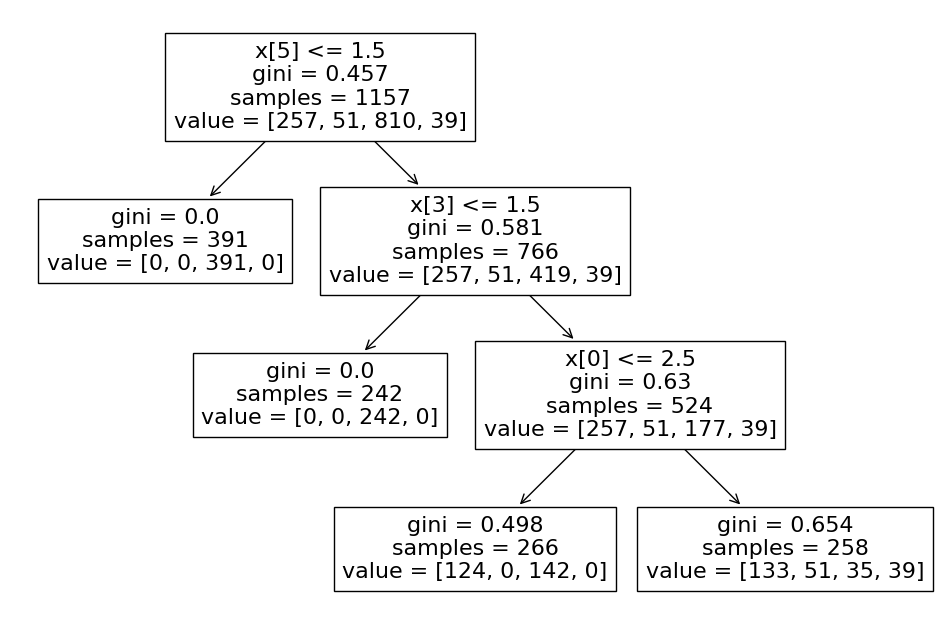

In [50]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train)) 

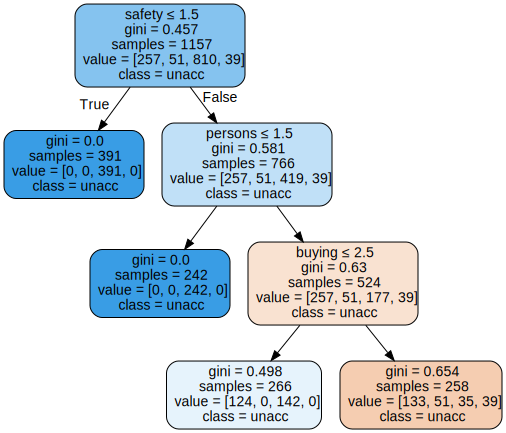

In [51]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [52]:
# Calculate the ROC curve and AUC score for both models
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test, y_prob_clf[:, 1],pos_label=1)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn[:, 1],pos_label=1)

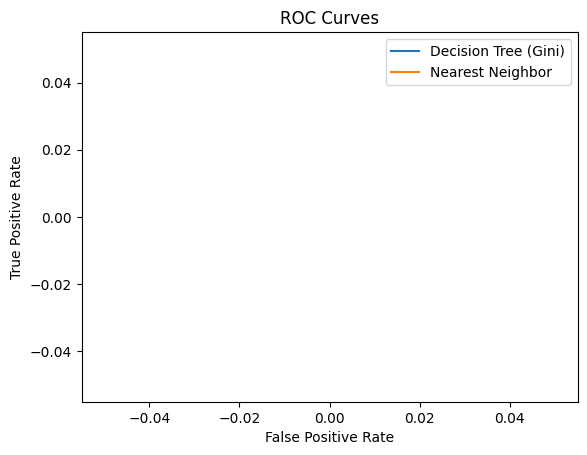

In [53]:
# Plot the ROC curves for both models
plt.plot(fpr_clf, tpr_clf, label='Decision Tree (Gini)')
plt.plot(fpr_knn, tpr_knn, label='Nearest Neighbor')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [54]:
# Calculate the confusion matrix for both models
confusion_matrix_clf = confusion_matrix(y_test, clf.predict(X_test))
confusion_matrix_knn = confusion_matrix(y_test, knn.predict(X_test))

In [55]:
# Print the confusion matrices for both models
print('Confusion Matrix (Decision Tree (Gini)):')
print(confusion_matrix_clf)
print('Confusion Matrix (Nearest Neighbor):')
print(confusion_matrix_knn)

Confusion Matrix (Decision Tree (Gini)):
[[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]
Confusion Matrix (Nearest Neighbor):
[[103   1  23   0]
 [  8   5   4   1]
 [  5   1 393   0]
 [ 11   5   0  10]]
